# Medical Imaging 2021/2022
## Lab 6
João Félix Pimenta | Maja Milekic | Miguel Joaquim Roque Fernandes

#### Import Relevant Libraries

In [1]:
import numpy as np
import math
import cmath
from scipy.io import loadmat
from PIL import Image
from matplotlib import pyplot as plt
from PIL import Image

Consider the study of a homogenous sample with T1/T2 = 600/60 ms, using a saturation recovery NMR pulse sequence, with an excitation flip angle of 65º, TE/TR = 1/900 ms and a total number of excitations / repetitions NEX = 10.

In [2]:
# Parameters

T1 = 0.6 #longitudinal time constant (seconds)
T2 = 0.06 #transverse time constant (seconds)

flip_angle = 65*(math.pi/180) 

TE = 0.001 #echo time/acquisition time (seconds)
TR = 0.9 #repetition time (seconds)

NEX = 10 #total number of excitations/repetitions

#### Exercise 1
Draw the pulse sequence diagram (including indication of the RF pulses, signal
acquisition times, TE and TR).

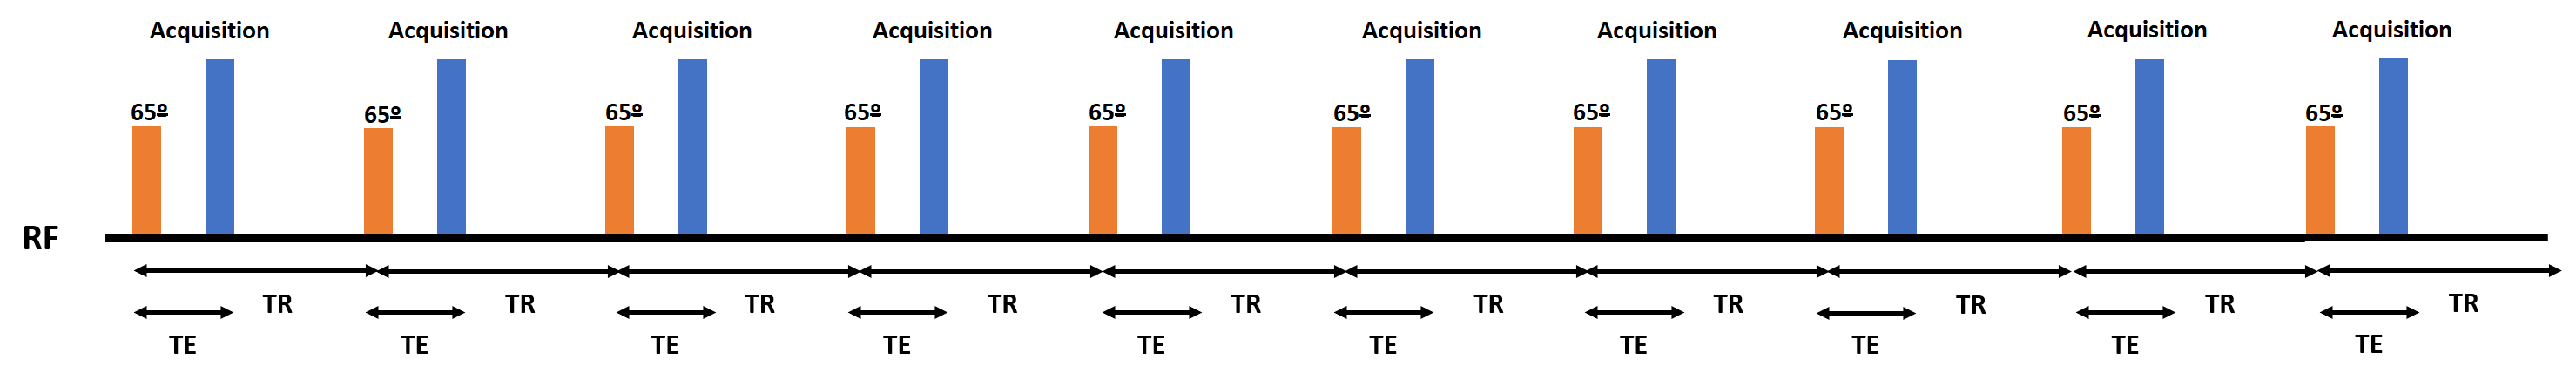

In [7]:
Image.open('Pulse_Sequence_Diagram_1.png')

#### Exercise 2
Compute the total study duration.

In [3]:
total_dur = NEX * TR # seconds
print("Total study duration: ", total_dur, "s")

Total study duration:  9.0 s


In the following simulations, use the rotating reference frame and a time step of 1 ms. Consider on-resonance spins and the equilibrium magnetization vector M$_0$ = [0,0,1].

In [4]:
dt = 0.001 # time step (seconds)
M0 = [0,0,1]

#### Exercise 3
Simulate the evolution of the longitudinal and transverse magnetization during the sequence.

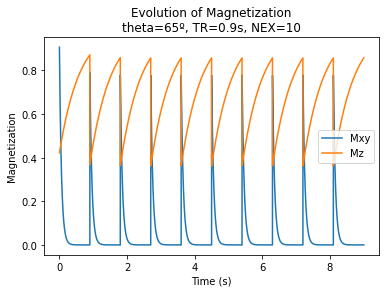

In [28]:
M = np.zeros((3,int(TR*NEX/dt)+1))

Mxy = np.zeros((1,int(TR*NEX/dt)+1))


# Initial magnetization after excitation along x
M[:,0] = np.matmul([[1, 0, 0],
                    [0, math.cos(flip_angle), math.sin(flip_angle)],
                    [0, -math.sin(flip_angle), math.cos(flip_angle)]], M0)

x = (M[0,0],M[1,0])
Mxy[0,0] = np.linalg.norm(x)

nex = 1
for i in range(0,int(TR*NEX/dt)):
    
    if i*dt == nex*TR:
        #Excitation
        M[:,i+1] = np.matmul([[1, 0, 0],
                              [0, math.cos(flip_angle), math.sin(flip_angle)],
                              [0, -math.sin(flip_angle), math.cos(flip_angle)]], M[:,i])
        nex = nex+1
        
    else:
        #Relaxation
        M[:,i+1] = np.matmul([[math.exp(-dt/T2), 0, 0],
                              [0, math.exp(-dt/T2), 0],
                              [0, 0, math.exp(-dt/T1)]], M[:,i]) + [0, 0, np.linalg.norm(M0)*(1-math.exp(-dt/T1))]

    x = (M[0,i+1],M[1,i+1])
    Mxy[0,i+1] = np.linalg.norm(x)
    

t = np.linspace(0, TR*NEX, num=int(TR*NEX/dt)+1)
plt.plot(t, Mxy[0,:], label = 'Mxy')
plt.plot(t, M[2,:], label = 'Mz')
plt.title('Evolution of Magnetization\ntheta=65º, TR=0.9s, NEX=10')
plt.xlabel('Time (s)')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


#### Exercise 4
Indicate which component of the magnetization is measured and plot its amplitude
at each acquisition time.

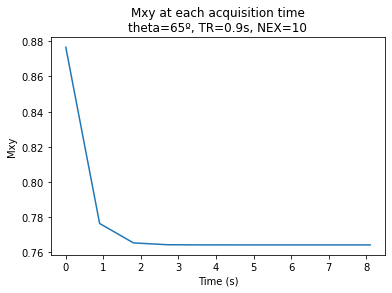

In [25]:
# We want to measure the transverse component of the magnetization - Mxy

Mxy_amp = np.zeros((1,NEX))
te = np.zeros((1,NEX))

nex = 0
for i in range(0,int(TR*NEX/dt)):
    
    if round(i*dt,3) == round(nex*TR+TE,3):
        Mxy_amp[0,nex] = Mxy[0,i+1]
        te[0,nex] = nex*TR+TE
        nex = nex+1

        
#print(Mxy_amp,te)

plt.plot(te[0,:], Mxy_amp[0,:])
plt.title('Mxy at each acquisition time\ntheta=65º, TR=0.9s, NEX=10')
plt.xlabel('Time (s)')
plt.ylabel('Mxy')
plt.show()


#### Exercise 5
Calculate the steady-state magnetization, M$_s$$_s$, and determine this from the data.

In [22]:
# TR >> T2:
M_ss_calc = (1-math.exp(-TR/T1))/(1-math.exp(-TR/T1)*math.cos(flip_angle))*math.exp(-TE/T2)*math.sin(flip_angle) 

M_ss_data = Mxy_amp[0,9]

print("Mss calcualted: ", M_ss_calc,
      "\nMss from the data: ", M_ss_data,
      "\ntheta=65º, TR=900ms, NEX=10")

Mss calcualted:  0.7645410819991177 
Mss from the data:  0.764307586902656 
theta=65º, TR=900ms, NEX=10


#### Exercise 6
Repeat 3 - 5, if TR is reduced to 90 ms and NEX is increased to 100 (yielding the
same total study duration). 

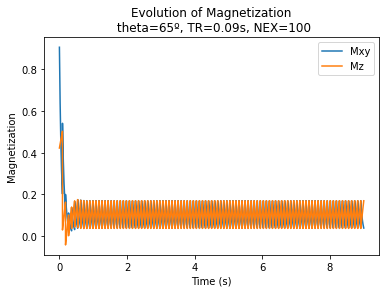

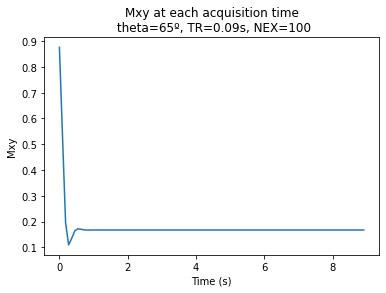

Mss calcualted:  0.19513561560042636 
Mss from the data:  0.16671889830409758 
theta=65º, TR=90ms, NEX=100


In [26]:
# New parameters
TR2 = 0.09 # repetition time (seconds)
NEX2 = 100 # total number of excitations/repetitions


# Exercise 3 - Evolution of the longitudinal and transverse magnetization during the sequence
M2 = np.zeros((3,int(TR2*NEX2/dt)+1))

Mxy2 = np.zeros((1,int(TR2*NEX2/dt)+1))


# Initial magnetization after excitation along x
M2[:,0] = np.matmul([[1, 0, 0],
                     [0, math.cos(flip_angle), math.sin(flip_angle)],
                     [0, -math.sin(flip_angle), math.cos(flip_angle)]], M0)

x = (M2[0,0],M2[1,0])
Mxy2[0,0] = np.linalg.norm(x)

nex = 1
for i in range(0,int(TR2*NEX2/dt)):
    
    if round(i*dt,3) == round(nex*TR2,3):
        #Excitation
        M2[:,i+1] = np.matmul([[1, 0, 0],
                               [0, math.cos(flip_angle), math.sin(flip_angle)],
                               [0, -math.sin(flip_angle), math.cos(flip_angle)]], M2[:,i])
        nex = nex+1
        
    else:
        #Relaxation
        M2[:,i+1] = np.matmul([[math.exp(-dt/T2), 0, 0],
                               [0, math.exp(-dt/T2), 0],
                               [0, 0, math.exp(-dt/T1)]], M2[:,i]) + [0, 0, np.linalg.norm(M0)*(1-math.exp(-dt/T1))]

    x = (M2[0,i+1],M2[1,i+1])
    Mxy2[0,i+1] = np.linalg.norm(x)
    
    
t2 = np.linspace(0, TR2*NEX2, num=int(TR2*NEX2/dt)+1)
plt.plot(t2, Mxy2[0,:], label = 'Mxy')
plt.plot(t2, M2[2,:], label = 'Mz')
plt.title('Evolution of Magnetization\n theta=65º, TR=0.09s, NEX=100')
plt.xlabel('Time (s)')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


# Exercise 4 - Plot Mxy amplitude at each acquisition time
Mxy_amp2 = np.zeros((1,NEX2))
te2 = np.zeros((1,NEX2))

nex = 0
for i in range(0,int(TR2*NEX2/dt)):
    
    if round(i*dt,3) == round(nex*TR2+TE,3):
        Mxy_amp2[0,nex] = Mxy2[0,i+1]
        te2[0,nex] = nex*TR2+TE
        nex = nex+1


plt.plot(te2[0,:], Mxy_amp2[0,:])
plt.title('Mxy at each acquisition time\n theta=65º, TR=0.09s, NEX=100')
plt.xlabel('Time (s)')
plt.ylabel('Mxy')
plt.show()


# Exercise 5 - Calculate the steady-state magnetization, Mss
# TR > T2 
M_ss_calc2 = (1-math.exp(-TR2/T1))/(1-math.exp(-TR2/T1)*math.cos(flip_angle))*math.exp(-TE/T2)*math.sin(flip_angle) 

M_ss_data2 = Mxy_amp2[0,9]

print("Mss calcualted: ", M_ss_calc2, 
      "\nMss from the data: ", M_ss_data2,
      "\ntheta=65º, TR=90ms, NEX=100")

#### Exercise 7
Compute the Ernst angle, the flip angle that maximizes the value of Mss, for each TR
value considered. Verify that the given value of 65º is close to optimal for TR =
900 ms but not TR = 90 ms.

In [20]:
# Ernst angle -> flip angle that maximizes the value of Mss 
# cos(Ernest_angle) = exp(-TR/T1)

Ernst_900 = math.acos(math.exp(-TR/T1))*(180/math.pi)

Ernst_90 = math.acos(math.exp(-TR2/T1))*(180/math.pi)

print("Ernst angle for TR = 900ms: ", round(Ernst_900,2),
      "º \nErnst angle for TR = 90ms: ", round(Ernst_90,2), "º")

# Value of 65º is close to optimal for TR = 900 ms but not TR = 90 ms

Ernst angle for TR = 900ms:  77.11 º 
Ernst angle for TR = 90ms:  30.6 º


#### Exercise 8
Repeat 6 using the Ernst angle for TR = 90 ms.

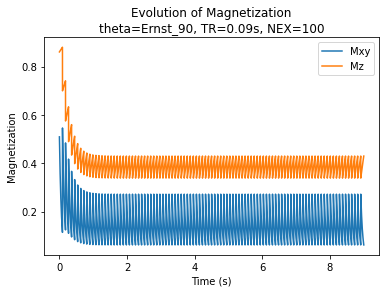

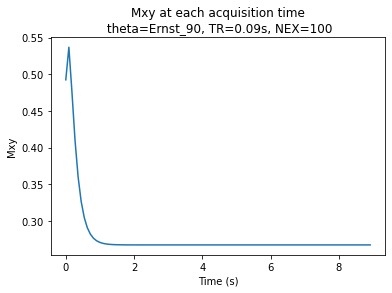

Mss calcualted:  0.26908269753005676 
Mss from the data:  0.2764012189049296 
theta=Ernst_90, TR=90ms, NEX=100


In [27]:
# New parameters
TR2 = 0.09 #repetition time (seconds)
NEX2 = 100 #total number of excitations/repetitions
Ernst_90 = math.acos(math.exp(-TR2/T1)) #Ernest angle for TR = 90 ms

# Exercise 3 - Evolution of the longitudinal and transverse magnetization during the sequence
M2 = np.zeros((3,int(TR2*NEX2/dt)+1))

Mxy2 = np.zeros((1,int(TR2*NEX2/dt)+1))


# Initial magnetization after excitation along x
M2[:,0] = np.matmul([[1, 0, 0],
                     [0, math.cos(Ernst_90), math.sin(Ernst_90)],
                     [0, -math.sin(Ernst_90), math.cos(Ernst_90)]], M0)

x = (M2[0,0],M2[1,0])
Mxy2[0,0] = np.linalg.norm(x)

nex = 1
for i in range(0,int(TR2*NEX2/dt)):
    
    if round(i*dt,3) == round(nex*TR2,3):
        #Excitation
        M2[:,i+1] = np.matmul([[1, 0, 0],
                               [0, math.cos(Ernst_90), math.sin(Ernst_90)],
                               [0, -math.sin(Ernst_90), math.cos(Ernst_90)]], M2[:,i])
        nex = nex+1
        
    else:
        #Relaxation
        M2[:,i+1] = np.matmul([[math.exp(-dt/T2), 0, 0],
                               [0, math.exp(-dt/T2), 0],
                               [0, 0, math.exp(-dt/T1)]], M2[:,i]) + [0, 0, np.linalg.norm(M0)*(1-math.exp(-dt/T1))]

    x = (M2[0,i+1],M2[1,i+1])
    Mxy2[0,i+1] = np.linalg.norm(x)
    
    
t2 = np.linspace(0, TR2*NEX2, num=int(TR2*NEX2/dt)+1)
plt.plot(t2, Mxy2[0,:], label = 'Mxy')
plt.plot(t2, M2[2,:], label = 'Mz')
plt.title('Evolution of Magnetization\ntheta=Ernst_90, TR=0.09s, NEX=100')
plt.xlabel('Time (s)')
plt.ylabel('Magnetization')
plt.legend()
plt.show()


# Exercise 4 - Plot Mxy amplitude at each acquisition time
Mxy_amp2 = np.zeros((1,NEX2))
te2 = np.zeros((1,NEX2))

nex = 0
for i in range(0,int(TR2*NEX2/dt)):
    
    if round(i*dt,3) == round(nex*TR2+TE,3):
        Mxy_amp2[0,nex] = Mxy2[0,i+1]
        te2[0,nex] = nex*TR2+TE
        nex = nex+1


plt.plot(te2[0,:], Mxy_amp2[0,:])
plt.title('Mxy at each acquisition time\n theta=Ernst_90, TR=0.09s, NEX=100')
plt.xlabel('Time (s)')
plt.ylabel('Mxy')
plt.show()


# Exercise 5 - Calculate the steady-state magnetization, Mss
M_ss_calc3 = (1-math.exp(-TR2/T1))/(1-math.exp(-TR2/T1)*math.cos(Ernst_90))*math.exp(-TE/T2)*math.sin(Ernst_90) 

M_ss_data3 = Mxy_amp2[0,9]

print("Mss calcualted: ", M_ss_calc3,
      "\nMss from the data: ", M_ss_data3,
      "\ntheta=Ernst_90, TR=90ms, NEX=100")

#### Exercise 9
Indicate how the SNR varies with NEX, and compare the overall SNR per unit time
of M$_s$$_s$ in 6 vs. 5 and 8 vs. 5.

In [23]:
# Compute relative SNR

SNR6vs5 = (math.sqrt(NEX2)*M_ss_data2)/(math.sqrt(NEX)*M_ss_data)

SNR8vs5 = (math.sqrt(NEX2)*M_ss_data3)/(math.sqrt(NEX)*M_ss_data)


print('The SNR of 6 is' , SNR6vs5 , 'times the SNR of 5')
print('The SNR of 8 is' , SNR8vs5 , 'times the SNR of 5')

The SNR of 6 is 0.6897896300773978 times the SNR of 5
The SNR of 8 is 1.1435937765951951 times the SNR of 5
